In [521]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import datasets
data= pd.read_csv(r"./dataset/diabetes.csv") # 당뇨병 데이터셋 불러오기
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [522]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


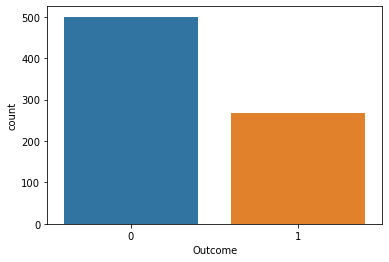

In [523]:
import seaborn as sns
sns.countplot(data['Outcome'],label="Count") # 0: 당뇨병 없음, 1: 당뇨병 있음

In [524]:
X = data.loc[:,data.columns != 'Outcome']
Y = data['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [525]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size = 0.2, random_state = 0)

In [526]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [527]:
def KNN(train, test, k):
    class_result=[]
    for i in range(0,len(test)):
        df = train-test.iloc[i]
        df = df**2
        train['Dist'] = np.sqrt(df.sum(axis=1))
        train['Outcome'] = Y_train
        train = train.sort_values(by='Dist')
        train_head = train['Outcome'].head(k)
        class_result.append(train_head.value_counts().index[0])
    test['Outcome'] = class_result
    return test

In [528]:
for i in range(1,12):
    match = 0
    if(i%2==1):
        for j in range(len(X_test)):
            test = KNN(X_train,X_test, i)
            if(Y_test.loc[j] == test.loc[j,'Outcome']):
                match += 1
        print("k값이",i, "일 때:: 정확도는::",match/len(X_test)*100,"%")
    else:
        pass

k값이 1 일 때:: 정확도는:: 61.68831168831169 %
k값이 3 일 때:: 정확도는:: 72.07792207792207 %
k값이 5 일 때:: 정확도는:: 75.32467532467533 %
k값이 7 일 때:: 정확도는:: 75.97402597402598 %
k값이 9 일 때:: 정확도는:: 77.27272727272727 %
k값이 11 일 때:: 정확도는:: 76.62337662337663 %
